In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [2]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

627

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [8]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | east london
Processing Record 2 of Set 1 | tasiilaq
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | kaitangata
Processing Record 5 of Set 1 | bintulu
Processing Record 6 of Set 1 | punta arenas
Processing Record 7 of Set 1 | husavik
Processing Record 8 of Set 1 | atuona
Processing Record 9 of Set 1 | coquimbo
Processing Record 10 of Set 1 | wanning
Processing Record 11 of Set 1 | vanimo
Processing Record 12 of Set 1 | oinacu
Processing Record 13 of Set 1 | vaini
Processing Record 14 of Set 1 | hermanus
Processing Record 15 of Set 1 | okhotsk
Processing Record 16 of Set 1 | busselton
Processing Record 17 of Set 1 | saskylakh
Processing Record 18 of Set 1 | rikitea
Processing Record 19 of Set 1 | kapaa
Processing Record 20 of Set 1 | karaul
City not found. Skipping...
Processing Record 21 of Set 1 | bredasdorp
Processing Record 22 of Set 1 | yellowknife
Processing Record 23 of Set 1 | port alfred
Processing Record 24 of Set 1 | tilichi

Processing Record 43 of Set 4 | rawannawi
City not found. Skipping...
Processing Record 44 of Set 4 | salamiyah
Processing Record 45 of Set 4 | vao
Processing Record 46 of Set 4 | dwarka
Processing Record 47 of Set 4 | alpena
Processing Record 48 of Set 4 | axim
Processing Record 49 of Set 4 | lebu
Processing Record 50 of Set 4 | tawkar
City not found. Skipping...
Processing Record 1 of Set 5 | marystown
Processing Record 2 of Set 5 | mount gambier
Processing Record 3 of Set 5 | chuy
Processing Record 4 of Set 5 | laguna
Processing Record 5 of Set 5 | dali
Processing Record 6 of Set 5 | dunedin
Processing Record 7 of Set 5 | jurado
Processing Record 8 of Set 5 | kodiak
Processing Record 9 of Set 5 | yulara
Processing Record 10 of Set 5 | mys shmidta
City not found. Skipping...
Processing Record 11 of Set 5 | ancud
Processing Record 12 of Set 5 | muros
Processing Record 13 of Set 5 | mar del plata
Processing Record 14 of Set 5 | conceicao do araguaia
Processing Record 15 of Set 5 | alta

Processing Record 31 of Set 8 | hobyo
Processing Record 32 of Set 8 | san juan
Processing Record 33 of Set 8 | vestmannaeyjar
Processing Record 34 of Set 8 | atka
City not found. Skipping...
Processing Record 35 of Set 8 | puerto maldonado
Processing Record 36 of Set 8 | luganville
Processing Record 37 of Set 8 | gorno-chuyskiy
City not found. Skipping...
Processing Record 38 of Set 8 | tuy hoa
Processing Record 39 of Set 8 | knysna
Processing Record 40 of Set 8 | buqayq
City not found. Skipping...
Processing Record 41 of Set 8 | raudeberg
Processing Record 42 of Set 8 | mantamados
Processing Record 43 of Set 8 | moron
Processing Record 44 of Set 8 | la ronge
Processing Record 45 of Set 8 | nizhnevartovsk
Processing Record 46 of Set 8 | korla
Processing Record 47 of Set 8 | matagami
Processing Record 48 of Set 8 | brae
Processing Record 49 of Set 8 | sao joao da barra
Processing Record 50 of Set 8 | flinders
Processing Record 1 of Set 9 | gornouralskiy
City not found. Skipping...
Proce

Processing Record 19 of Set 12 | potosi
Processing Record 20 of Set 12 | inirida
Processing Record 21 of Set 12 | mata
Processing Record 22 of Set 12 | uttaradit
Processing Record 23 of Set 12 | narsaq
Processing Record 24 of Set 12 | bayangol
Processing Record 25 of Set 12 | mokrin
Processing Record 26 of Set 12 | vieux-habitants
Processing Record 27 of Set 12 | chivay
Processing Record 28 of Set 12 | christchurch
Processing Record 29 of Set 12 | lixourion
Processing Record 30 of Set 12 | envira
Processing Record 31 of Set 12 | tigil
Processing Record 32 of Set 12 | emborion
Processing Record 33 of Set 12 | hunchun
Processing Record 34 of Set 12 | tingi
Processing Record 35 of Set 12 | bartica
Processing Record 36 of Set 12 | atambua
Processing Record 37 of Set 12 | suntar
Processing Record 38 of Set 12 | redhakhol
City not found. Skipping...
Processing Record 39 of Set 12 | palestine
Processing Record 40 of Set 12 | vanavara
Processing Record 41 of Set 12 | saint-leu
Processing Recor

In [9]:
len(city_data)

576

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,East London,-33.02,27.91,60.67,75,76,6.02,ZA,2020-07-30 22:07:21
1,Tasiilaq,65.61,-37.64,48.20,66,96,4.70,GL,2020-07-30 22:07:21
2,Ushuaia,-54.80,-68.30,31.17,94,56,4.43,AR,2020-07-30 22:07:19
3,Kaitangata,-46.28,169.85,50.00,74,99,1.99,NZ,2020-07-30 22:07:21
4,Bintulu,3.17,113.03,73.40,100,20,7.20,MY,2020-07-30 22:03:27
5,Punta Arenas,-53.15,-70.92,37.40,86,40,12.75,CL,2020-07-30 22:05:07
6,Husavik,66.04,-17.34,51.80,81,45,11.41,IS,2020-07-30 22:07:21
7,Atuona,-9.80,-139.03,79.03,75,7,18.12,PF,2020-07-30 22:07:21
8,Coquimbo,-29.95,-71.34,59.00,72,16,12.75,CL,2020-07-30 22:07:21
9,Wanning,18.80,110.40,79.29,91,100,8.90,CN,2020-07-30 22:07:21


In [11]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,East London,ZA,2020-07-30 22:07:21,-33.02,27.91,60.67,75,76,6.02
1,Tasiilaq,GL,2020-07-30 22:07:21,65.61,-37.64,48.20,66,96,4.70
2,Ushuaia,AR,2020-07-30 22:07:19,-54.80,-68.30,31.17,94,56,4.43
3,Kaitangata,NZ,2020-07-30 22:07:21,-46.28,169.85,50.00,74,99,1.99
4,Bintulu,MY,2020-07-30 22:03:27,3.17,113.03,73.40,100,20,7.20
5,Punta Arenas,CL,2020-07-30 22:05:07,-53.15,-70.92,37.40,86,40,12.75
6,Husavik,IS,2020-07-30 22:07:21,66.04,-17.34,51.80,81,45,11.41
7,Atuona,PF,2020-07-30 22:07:21,-9.80,-139.03,79.03,75,7,18.12
8,Coquimbo,CL,2020-07-30 22:07:21,-29.95,-71.34,59.00,72,16,12.75
9,Wanning,CN,2020-07-30 22:07:21,18.80,110.40,79.29,91,100,8.90


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [14]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'07/30/20'

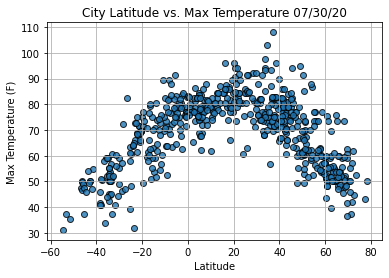

In [15]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

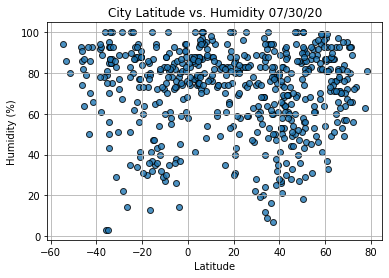

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

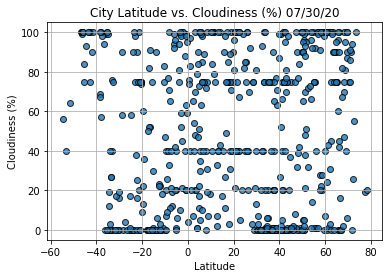

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

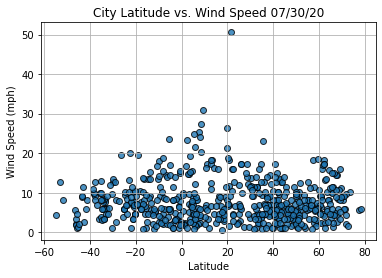

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()